# Analysez des données de systèmes éducatifs

## Data Analysis

This notebook outlines the data analysis steps for examining the World Bank EdStats dataset. The workflow is divided into three key stages:
1. **Descriptive analysis**: Examining the overall structure of the 13 selected indicators.
2. **Univariate analysis**: Analyzing each of the 13 selected indicators for each country across a 10-year timeframe.
3. **Bivariate analysis**: Exploring interactions between variables with moderate or higher correlations.

The output of this notebook includes visualisation to inform business decisions.

## Instructions for Use

1. Run the P2_data_processing.ipynb notebook to generate the cleaned files.
2. Update the file paths in the code below to match your local directory structure.

In [2]:
# File paths [update with your file path]
data_path_raw = (
    '/Users/nataschajademinnitt/Documents/5. Data Analysis/'
    'open_classrooms/project_2/data/raw/'
)

data_path_processed = (
    '/Users/nataschajademinnitt/Documents/5. Data Analysis/'
    'open_classrooms/project_2/data/processed/'
)

figures_path = (
    '/Users/nataschajademinnitt/Documents/5. Data Analysis/'
    'open_classrooms/project_2/results/figures/'
)

## Part 4: Data Analysis and Visualization

### Load data

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set environment
pd.set_option('display.float_format', '{:.1f}'.format)
sns.set_theme(style="whitegrid", context="paper")

In [6]:
df_agg = pd.read_csv(data_path_processed + 'processed_df.csv', low_memory=False)
df_short_mean = pd.read_csv(data_path_processed + 'df_short_mean.csv', low_memory=False)
df_short_recent = pd.read_csv(data_path_processed + 'df_short_recent.csv', low_memory=False)
df_long = pd.read_csv(data_path_processed + 'df_long.csv', low_memory=False)

### Descriptive Analysis

In [8]:
# Descriptive summary of indicators across countries
df_short_mean.describe()

,"Gross enrolment, upper secondary","Gross enrolment, tertiary","Private enrolment, secondary","Private enrolment, tertiary","General programme share, upper secondary","Vocational programme share, upper secondary","Attainment, upper secondary (25+)","Attainment, short-cycle tertiary (25+)","Attainment, Bachelor's or higher (25+)","Govt expenditure, upper secondary (% GDP)","Govt expenditure, tertiary (% GDP)",Education expenditure (% of govt),"Household funding, tertiary (% GDP/capita)"
count,13.0,13.0,13.0,12.0,13.0,13.0,12.0,12.0,12.0,12.0,12.0,12.0,7.0
mean,118.5,76.6,24.6,35.4,65.4,34.6,71.7,33.7,25.6,0.9,1.2,11.9,7.3
std,27.9,14.6,22.2,32.6,21.8,21.8,14.1,12.4,6.2,0.2,0.3,3.6,4.5
min,96.0,62.6,6.4,5.3,32.0,0.0,50.7,15.4,15.7,0.6,0.7,7.9,2.1
25%,102.4,65.8,8.6,14.8,48.3,22.3,59.9,26.9,21.1,0.8,1.1,9.4,4.0
50%,107.7,70.5,14.3,21.6,59.4,40.6,74.4,31.4,26.0,0.9,1.3,11.8,7.4
75%,126.6,87.1,29.3,40.8,77.6,51.7,83.4,42.6,30.9,1.1,1.4,12.8,9.3
max,202.3,111.4,73.4,100.0,100.0,68.0,90.2,60.2,34.3,1.3,1.7,20.5,14.7


**Observation Gross Enrolment Ratio (GER)**

The Gross Enrollment Ratio (GER) indicators can exceed 100%. GER measures total enrollment in a specific level of education, regardless of students' ages, as a percentage of the population in the official age group for that level. GER can exceed 100% due to the inclusion of students outside the official school-age group. Key reasons include:

1. Late Entry into School: Students who start schooling later than the expected age.
2. Early Entry into School: Students who begin schooling earlier than the expected age.
3. International Students (Non-Residents): Enrollment of students from other countries.
4. Grade Repetition: Students repeating a grade and therefore staying enrolled longer than usual.

- GER > 100% indicates that a country is accommodating students beyond its official school-age population.
- It suggests that the education system has sufficient capacity to enroll all school-age children as well as additional students from other age groups.

For further details, see the full indicator description here: [Gross Enrollment Ratio](https://uis.unesco.org/en/glossary).

---
**Observation Private Enrolment, Tertiary Education**

For the United Kingdom, private enrollment in tertiary education is consistently reported as 100%. This classification arises due to the way UK universities are categorized internationally.

According to UNESCO and other global data collection standards, educational institutions are classified as private if they are not directly owned or controlled by the government, even if they receive public funding. UK universities fall under this category, leading to their classification as private institutions.

- The 100% private enrollment does not imply that students pay full private tuition fees, as many benefit from government-backed loans or grants.

For further details, see the full indicator description here: [Private vs. Public Education](https://uis.unesco.org/en/glossary).

---
**General Programme Share, Upper Secondary**

The max is 100%. In the US, the vast majority of upper secondary education is delivered through general education programmes, such as traditional high schools.
These programmes are designed to prepare students for higher education (college/university) rather than direct entry into the workforce.

Vocational education in the US (often referred to as Career and Technical Education or CTE) is generally offered alongside or as part of general education, rather than as a distinct alternative track.

### Univariate analysis

#### Gross Enrolment Ratio (% Secondary, Tertiary)

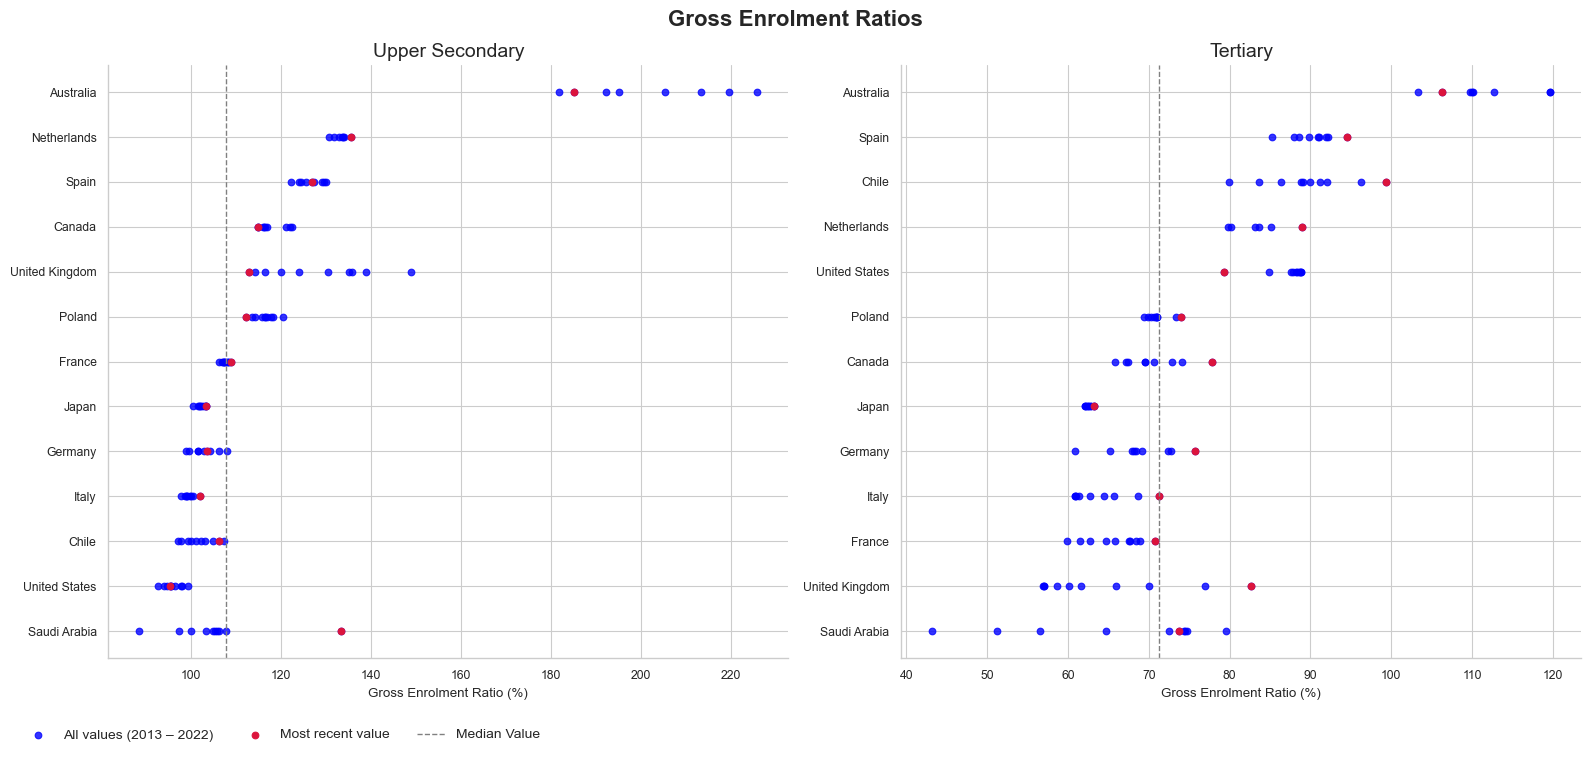

In [12]:
# Gross enrolment ratio for secondary and tertiary education
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle("Gross Enrolment Ratios", fontsize=16, weight='bold')

# Left plot: Gross Enrolment Ratio Upper Secondary
df_sorted_upper = df_long.sort_values("Gross enrolment, upper secondary", ascending=True)
median_upper = df_long["Gross enrolment, upper secondary"].median()

axes[0].scatter(
    x=df_sorted_upper["Gross enrolment, upper secondary"],
    y=df_sorted_upper['country'],
    color='blue',
    alpha=0.8,
    label="All values (2013 – 2022)"
)
axes[0].scatter(
    x=df_short_recent["Gross enrolment, upper secondary"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[0].axvline(median_upper, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[0].set_title("Upper Secondary", fontsize=14)

# Right plot: Gross Enrolment Ratio Tertiary
df_sorted_tertiary = df_long.sort_values("Gross enrolment, tertiary", ascending=True)
median_tertiary = df_long["Gross enrolment, tertiary"].median()

axes[1].scatter(
    x=df_sorted_tertiary["Gross enrolment, tertiary"], 
    y=df_sorted_tertiary['country'], 
    color='blue',
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[1].scatter(
    x=df_short_recent["Gross enrolment, tertiary"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[1].axvline(median_tertiary, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[1].set_title("Tertiary", fontsize=14)

# Format
for ax in axes:
    sns.despine(ax=ax, top=True, right=True)
    ax.set_xlabel("Gross Enrolment Ratio (%)")
    ax.legend().set_visible(False)

# Legend
plt.tight_layout(rect=[0, 0.1, 1, 1])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc="lower left", 
    bbox_to_anchor=(0.01, 0.05), 
    frameon=False,
    fontsize=10,
    ncols=3
)

# Adjust and save
plt.savefig(figures_path + 'gross_enrolment_ratio_country_year.png', dpi=300)
plt.show()

Observations:
* The median for secondary enrolment ratio is > 100, suggesting repeating grades, adults returning to education, or international enrolments.
* The GERs for tertiary education are generally lower than for upper secondary.
* There seems to be more variability in GERs for tertiary education compared to upper secondary.

#### Enrolment ratio (% private / public)

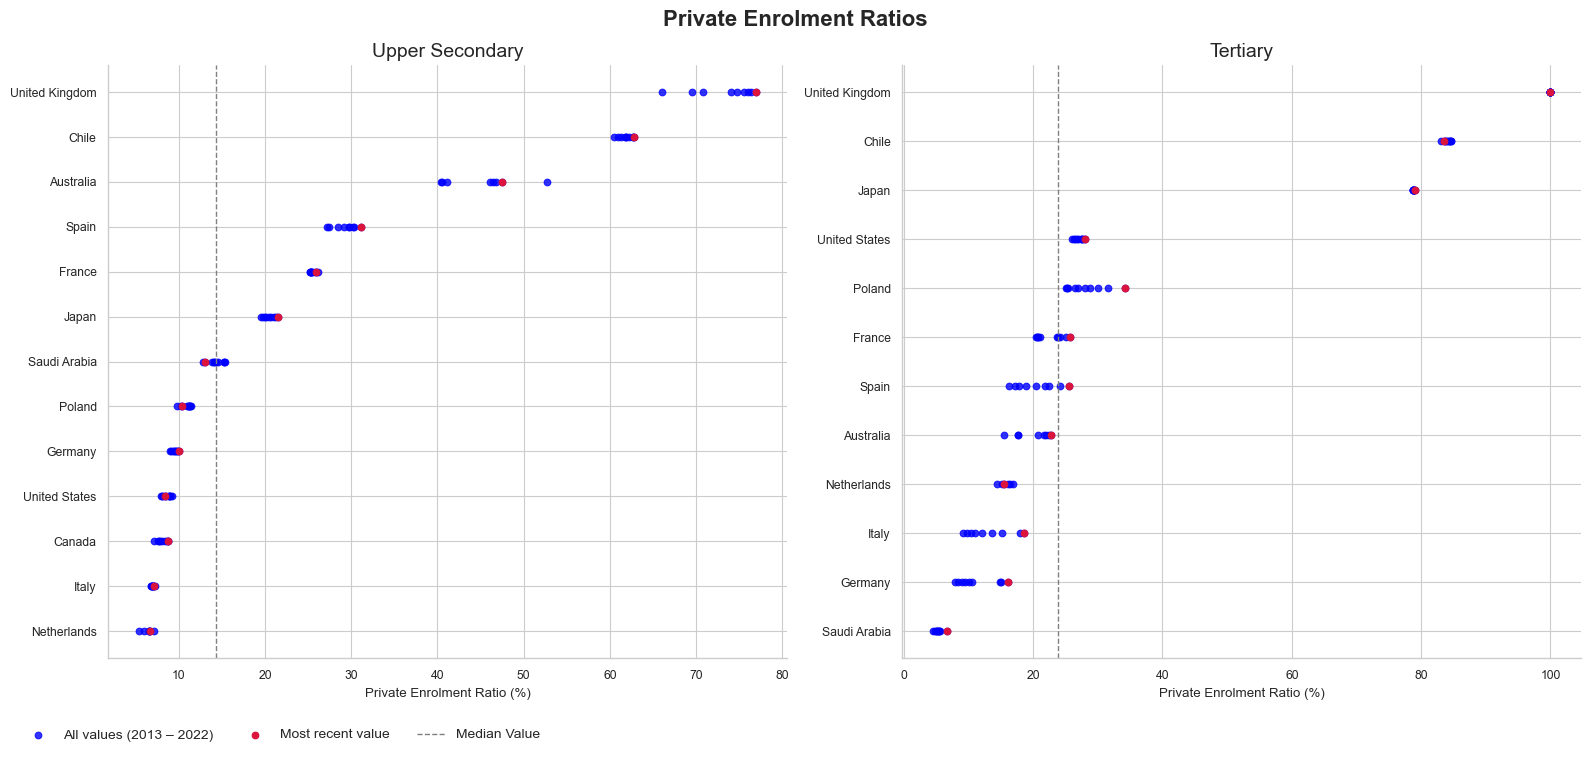

In [15]:
# Enrolment ratio in private institutions (%)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle("Private Enrolment Ratios", fontsize=16, weight='bold')

# Left plot: Private Enrolment Ratio Upper Secondary
df_sorted_upper = df_long.sort_values("Private enrolment, secondary", ascending=True)
median_upper = df_long["Private enrolment, secondary"].median()

axes[0].scatter(
    x=df_sorted_upper["Private enrolment, secondary"], 
    y=df_sorted_upper['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[0].scatter(
    x=df_short_recent["Private enrolment, secondary"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[0].axvline(median_upper, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[0].set_xlabel("Private Enrolment Ratio (%)")
axes[0].set_title("Upper Secondary", fontsize=14)

# Right plot: Private Enrolment Ratio Tertiary
df_sorted_tertiary = df_long.sort_values("Private enrolment, tertiary", ascending=True)
median_tertiary = df_long["Private enrolment, tertiary"].median()

axes[1].scatter(
    x=df_sorted_tertiary["Private enrolment, tertiary"], 
    y=df_sorted_tertiary['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[1].scatter(
    x=df_short_recent["Private enrolment, tertiary"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[1].axvline(median_tertiary, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[1].set_xlabel("Private Enrolment Ratio (%)")
axes[1].set_title("Tertiary", fontsize=14)

# Format
for ax in axes:
    sns.despine(ax=ax, top=True, right=True)

# Legend
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc="lower left", 
    bbox_to_anchor=(0.01, 0.05), 
    frameon=False,
    fontsize=10,
    ncols=3
)

# Adjust and save
plt.savefig(figures_path + 'private_enrolment_ratio_country.png', dpi=300)
plt.show()

Observations:
* There is a high dependency on private education in the UK and Chile for sec and tertiary.
* Non-eu nations demonstrate a higher prevalence of private education.

#### Programme share (% genral / vocational)

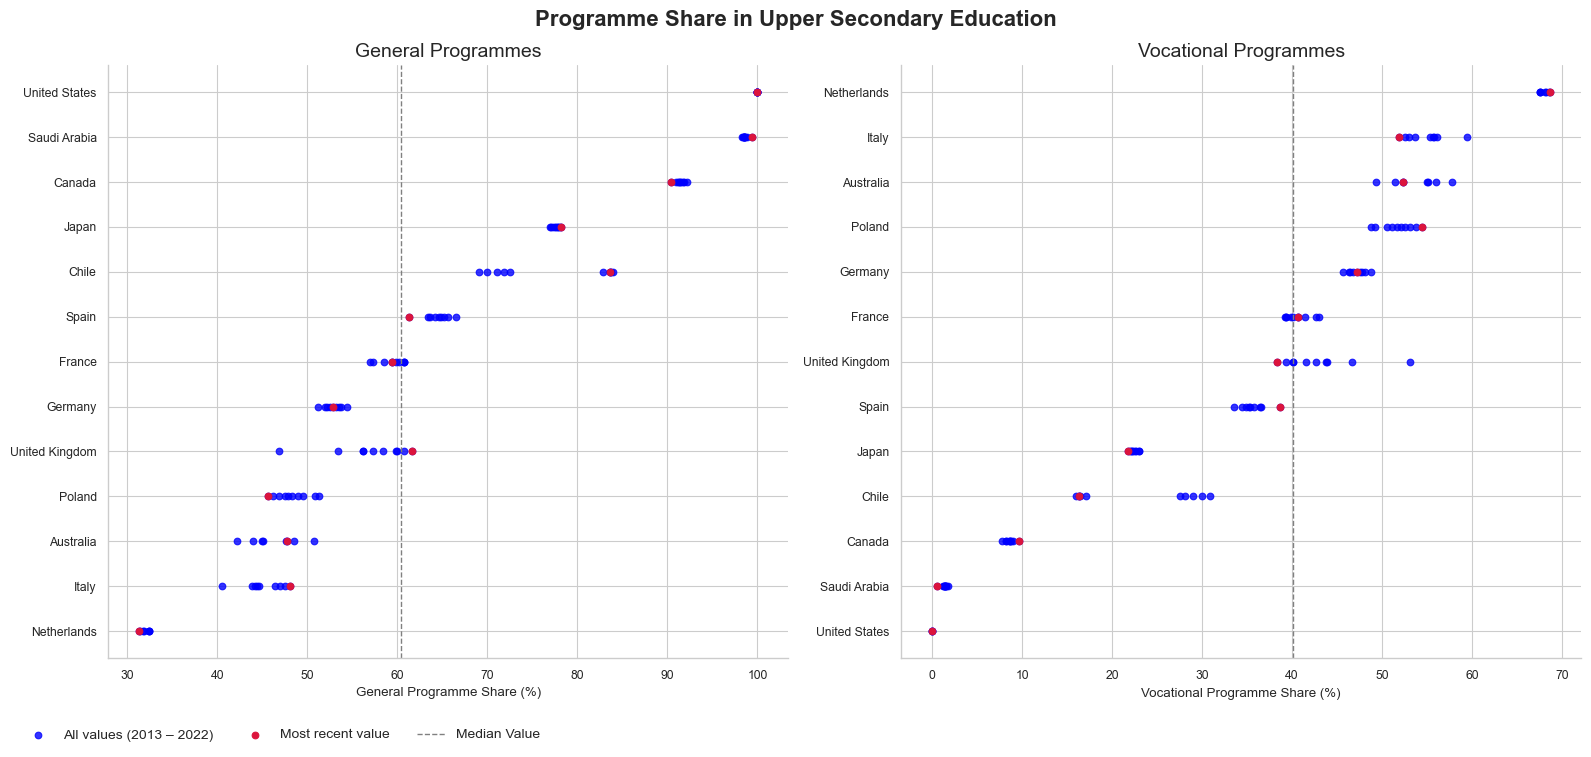

In [18]:
# Programme share in upper secondary education (%)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle("Programme Share in Upper Secondary Education", fontsize=16, weight='bold')

# Left plot: General Programme Share
df_sorted_general = df_long.sort_values("General programme share, upper secondary", ascending=True)
median_general = df_long["General programme share, upper secondary"].median()

axes[0].scatter(
    x=df_sorted_general["General programme share, upper secondary"], 
    y=df_sorted_general['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[0].scatter(
    x=df_short_recent["General programme share, upper secondary"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[0].axvline(median_general, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[0].set_xlabel("General Programme Share (%)")
axes[0].set_title("General Programmes", fontsize=14)

# Right plot: Vocational Programme Share
df_sorted_vocational = df_long.sort_values("Vocational programme share, upper secondary", ascending=True)
median_vocational = df_long["Vocational programme share, upper secondary"].median()

axes[1].scatter(
    x=df_sorted_vocational["Vocational programme share, upper secondary"], 
    y=df_sorted_vocational['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[1].scatter(
    x=df_short_recent["Vocational programme share, upper secondary"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[1].axvline(median_vocational, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[1].set_xlabel("Vocational Programme Share (%)")
axes[1].set_title("Vocational Programmes", fontsize=14)

# Format
for ax in axes:
    sns.despine(ax=ax, top=True, right=True)

# Legend
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc="lower left", 
    bbox_to_anchor=(0.01, 0.05), 
    frameon=False,
    fontsize=10,
    ncols=3
)

# Adjust and save
plt.savefig(figures_path + 'programme_share_upper_secondary.png', dpi=300)
plt.show()

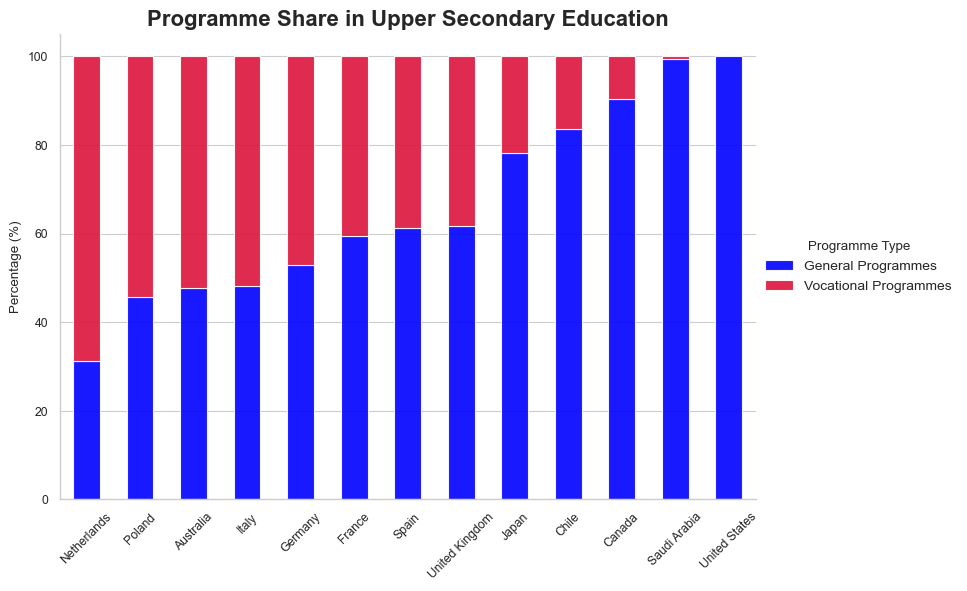

In [19]:
# Stacked bar plot of programme share
df_stack = df_agg.pivot(index='country', columns='indicator_name', values='recent')
df_stack = df_stack.sort_values("General programme share, upper secondary", ascending=True)
df_stack = df_stack[['General programme share, upper secondary', 'Vocational programme share, upper secondary']]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
df_stack.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'crimson'],
    alpha=0.9,
    ax=ax
)

# Annotate
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("")
ax.set_title("Programme Share in Upper Secondary Education", fontsize=16, weight='bold')
ax.legend(title="Programme Type", 
          labels=["General Programmes", "Vocational Programmes"], 
          loc="center right",
          bbox_to_anchor=(1.3, 0.5),
          fontsize=10,
          frameon=False)

# Format
sns.despine()
ax.grid(axis='x')
plt.xticks(rotation=45)
plt.tight_layout()

# Save
plt.savefig(figures_path + 'stacked_programme_share.png', dpi=300)
plt.show()

Observations:
* Vocational programmes are more common in EU countries.
* Vocational programmes are almost non-existant in the United States and Saudi Arabia.

#### Educational attainment

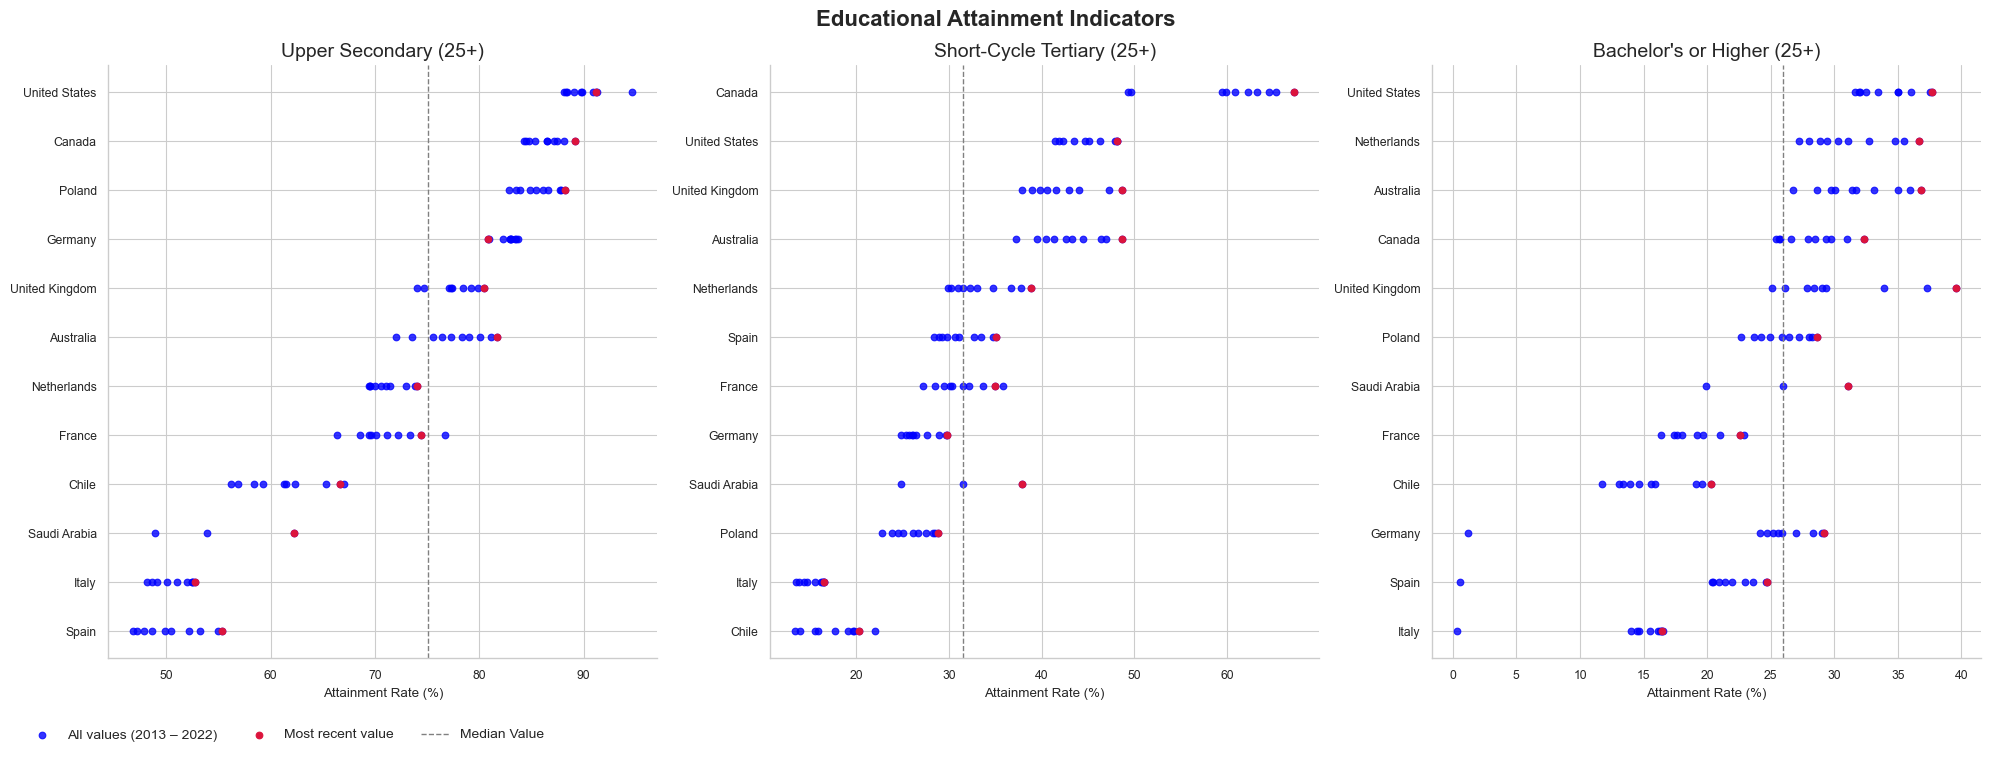

In [22]:
# Attainment indicators
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=False)
fig.suptitle("Educational Attainment Indicators", fontsize=16, weight='bold')

# Left plot: Attainment, Upper Secondary (25+)
df_sorted_upper = df_long.sort_values("Attainment, upper secondary (25+)", ascending=True)
median_upper = df_long["Attainment, upper secondary (25+)"].median()

axes[0].scatter(
    x=df_sorted_upper["Attainment, upper secondary (25+)"], 
    y=df_sorted_upper['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[0].scatter(
    x=df_short_recent["Attainment, upper secondary (25+)"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[0].axvline(median_upper, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[0].set_xlabel("Attainment Rate (%)")
axes[0].set_title("Upper Secondary (25+)", fontsize=14)

# Middle plot: Attainment, Short-Cycle Tertiary (25+)
df_sorted_short_cycle = df_long.sort_values("Attainment, short-cycle tertiary (25+)", ascending=True)
median_short_cycle = df_long["Attainment, short-cycle tertiary (25+)"].median()

axes[1].scatter(
    x=df_sorted_short_cycle["Attainment, short-cycle tertiary (25+)"], 
    y=df_sorted_short_cycle['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[1].scatter(
    x=df_short_recent["Attainment, short-cycle tertiary (25+)"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[1].axvline(median_short_cycle, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[1].set_xlabel("Attainment Rate (%)")
axes[1].set_title("Short-Cycle Tertiary (25+)", fontsize=14)

# Right plot: Attainment, Bachelor's or Higher (25+)
df_sorted_bachelors = df_long.sort_values("Attainment, Bachelor's or higher (25+)", ascending=True)
median_bachelors = df_long["Attainment, Bachelor's or higher (25+)"].median()

axes[2].scatter(
    x=df_sorted_bachelors["Attainment, Bachelor's or higher (25+)"], 
    y=df_sorted_bachelors['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[2].scatter(
    x=df_short_recent["Attainment, Bachelor's or higher (25+)"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[2].axvline(median_bachelors, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[2].set_xlabel("Attainment Rate (%)")
axes[2].set_title("Bachelor's or Higher (25+)", fontsize=14)

# Format
for ax in axes:
    sns.despine(ax=ax, top=True, right=True)

# Legend
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
axes[2].legend().set_visible(False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc="lower left", 
    bbox_to_anchor=(0.01, 0.05), 
    frameon=False,
    fontsize=10,
    ncols=3
)

# Adjust and save
plt.savefig(figures_path + 'attainment_indicators_country_year.png', dpi=300)
plt.show()

Observations:
* Countries like the United States, Canada, and the United Kingdom perform consistently well across all levels of education.
* This could be attributed their the dependency on private education = higher motivation to complete a level.
* Spain, Italy, and Chile lag across levels.

#### Gov expenditure (% GDP)

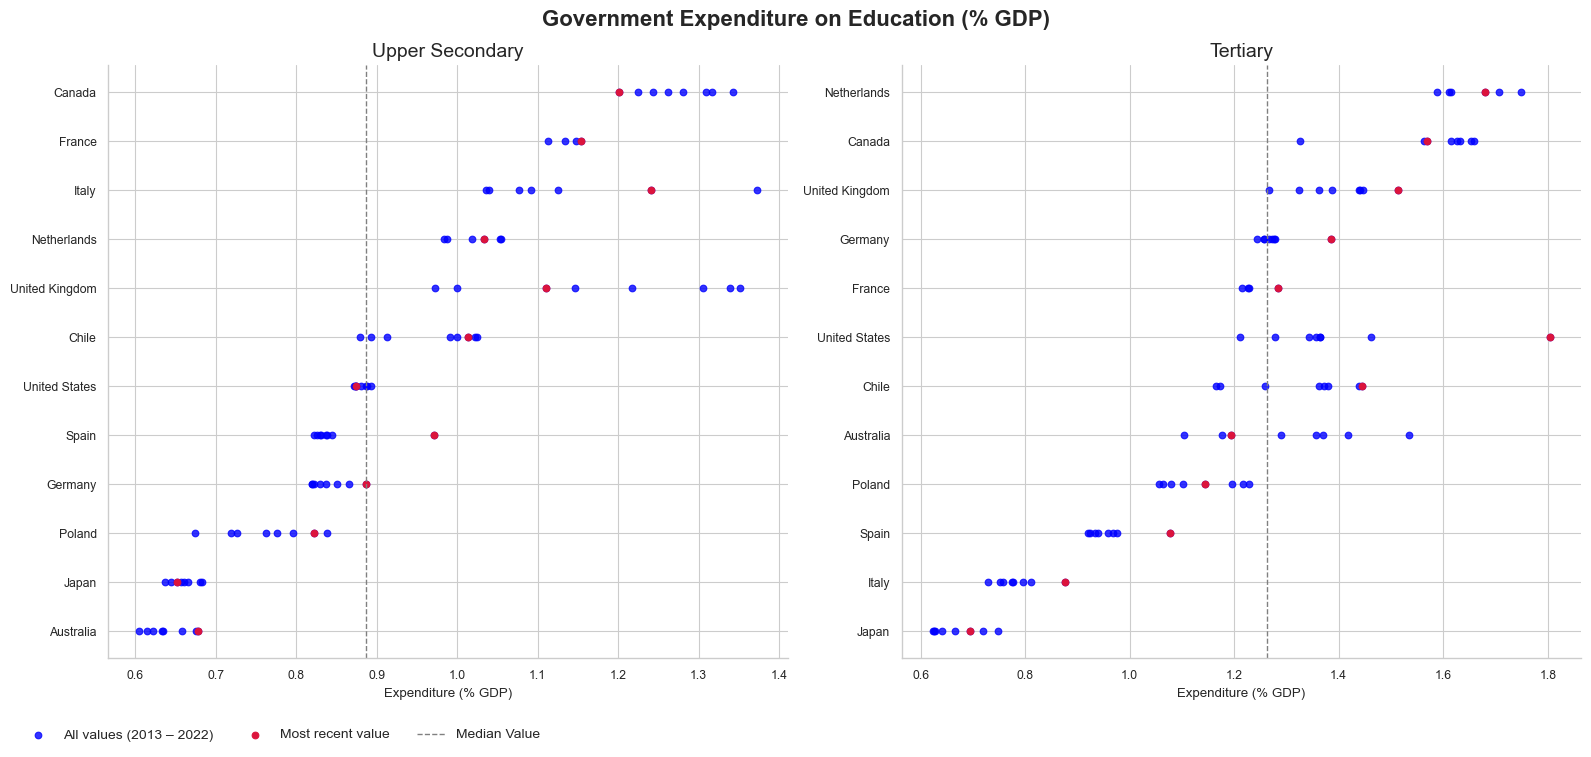

In [25]:
# Government Expenditure on Education (% GDP)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle("Government Expenditure on Education (% GDP)", fontsize=16, weight='bold')

# Left plot: Govt Expenditure on Upper Secondary
df_sorted_upper = df_long.sort_values("Govt expenditure, upper secondary (% GDP)", ascending=True)
median_upper = df_long["Govt expenditure, upper secondary (% GDP)"].median()

axes[0].scatter(
    x=df_sorted_upper["Govt expenditure, upper secondary (% GDP)"], 
    y=df_sorted_upper['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[0].scatter(
    x=df_short_recent["Govt expenditure, upper secondary (% GDP)"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[0].axvline(median_upper, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[0].set_xlabel("Expenditure (% GDP)")
axes[0].set_title("Upper Secondary", fontsize=14)

# Right plot: Govt Expenditure on Tertiary
df_sorted_tertiary = df_long.sort_values("Govt expenditure, tertiary (% GDP)", ascending=True)
median_tertiary = df_long["Govt expenditure, tertiary (% GDP)"].median()

axes[1].scatter(
    x=df_sorted_tertiary["Govt expenditure, tertiary (% GDP)"], 
    y=df_sorted_tertiary['country'], 
    color='blue', 
    alpha=0.8, 
    label="All values (2013 – 2022)"
)
axes[1].scatter(
    x=df_short_recent["Govt expenditure, tertiary (% GDP)"], 
    y=df_short_recent['country'], 
    color='crimson', 
    label="Most recent value"
)
axes[1].axvline(median_tertiary, color='grey', linestyle='--', linewidth=1, label="Median Value")
axes[1].set_xlabel("Expenditure (% GDP)")
axes[1].set_title("Tertiary", fontsize=14)

# Annotate
for ax in axes:
    sns.despine(ax=ax, top=True, right=True)

# Legend
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)
plt.tight_layout(rect=[0, 0.1, 1, 1])
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    loc="lower left", 
    bbox_to_anchor=(0.01, 0.05), 
    frameon=False,
    fontsize=10,
    ncols=3
)

# Adjust and save
plt.savefig(figures_path + 'govt_expenditure_gdp.png', dpi=300)
plt.show()

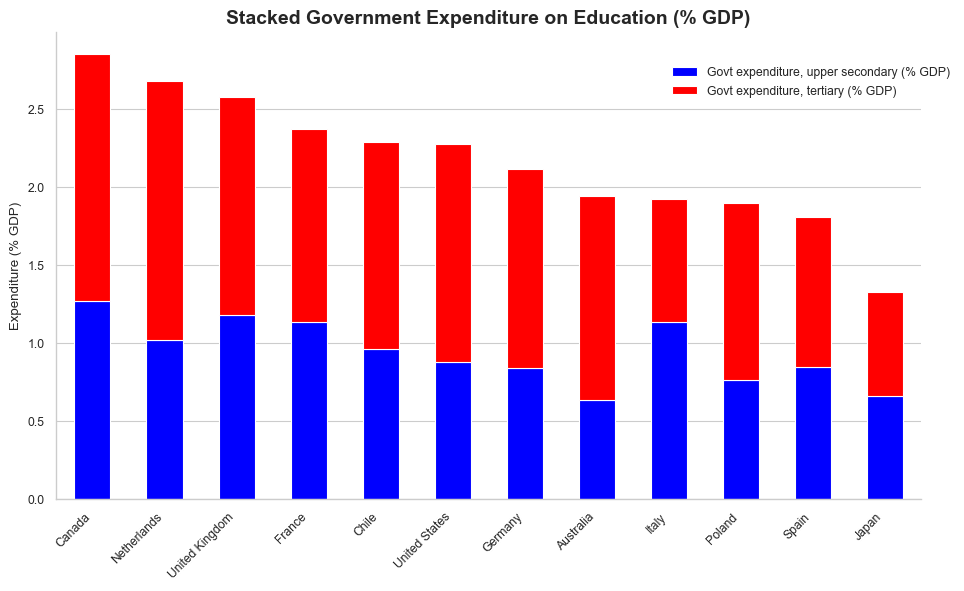

In [26]:
# Select only relevant columns
df = df_short_mean.loc[:, ['country', 'Govt expenditure, upper secondary (% GDP)', 'Govt expenditure, tertiary (% GDP)']]

# Total Expenditure (% GDP)
df['Total Expenditure (% GDP)'] = (
    df['Govt expenditure, upper secondary (% GDP)'] +
    df['Govt expenditure, tertiary (% GDP)']
)

# Filter NAN countries
df = df[df['Total Expenditure (% GDP)'] > 0]
df = df.sort_values(by='Total Expenditure (% GDP)', ascending=False)

# Plot
df.plot(
    kind='bar', 
    x='country',
    y=['Govt expenditure, upper secondary (% GDP)', 'Govt expenditure, tertiary (% GDP)'], 
    stacked=True, 
    figsize=(10, 6), 
    color=['blue', 'red']
)

# Format
plt.title("Stacked Government Expenditure on Education (% GDP)", fontsize=14, weight='bold')
plt.ylabel("Expenditure (% GDP)")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.legend(title="", bbox_to_anchor=(0.7, 0.95), loc='upper left', frameon=False)
plt.grid(axis='x', visible=False)

# Save
sns.despine()
plt.tight_layout()
plt.savefig(figures_path + 'stacked_government_expenditure_education.png', dpi=300)
plt.show()

#### Gov expenditure (% budget/capita)

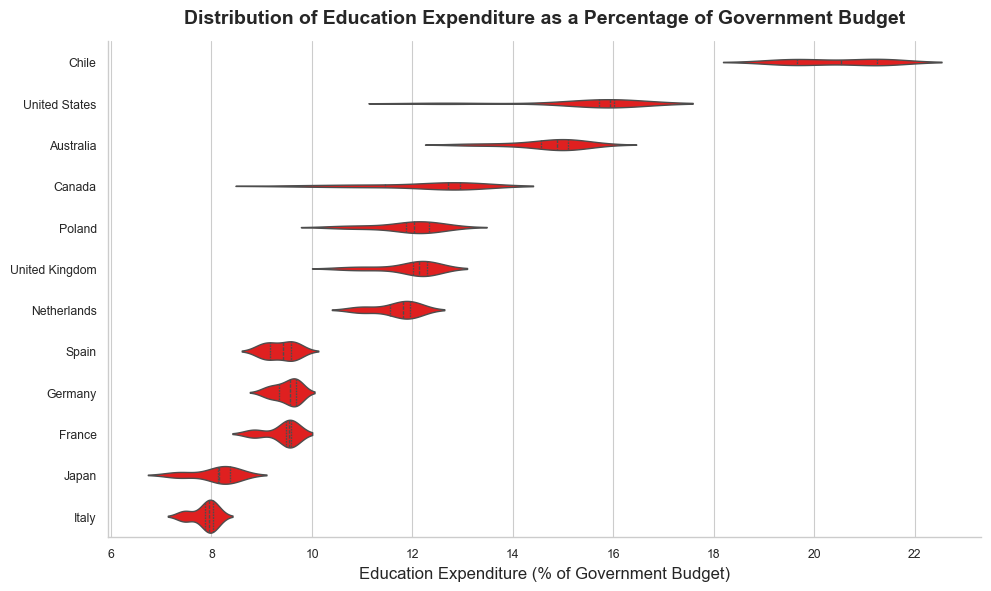

In [28]:
# Education Expenditure (% of Government Budget)
plt.figure(figsize=(10, 6))
df_sorted = df_long.sort_values("Education expenditure (% of govt)", ascending=False)
df_sorted = df_sorted[df_sorted['Education expenditure (% of govt)'] > 0]

# Plot
sns.violinplot(
    data=df_sorted, 
    x="Education expenditure (% of govt)", 
    y="country", 
    inner="quartile", 
    color="red"
)

# Format
plt.title("Distribution of Education Expenditure as a Percentage of Government Budget", fontsize=14, weight='bold', y=1.02)
plt.xlabel("Education Expenditure (% of Government Budget)", fontsize=12)
plt.ylabel("")
sns.despine(top=True, right=True)

# Save
plt.tight_layout()
plt.savefig(figures_path + 'education_expenditure_violin.png', dpi=300)
plt.show()

Observations:
* Chile spends the highest proportion of its government budget on education.
* It surprising that private education remains elevated in Chile.
* European countries show less variation in their education budget.

#### Household expenditure (% GDP)

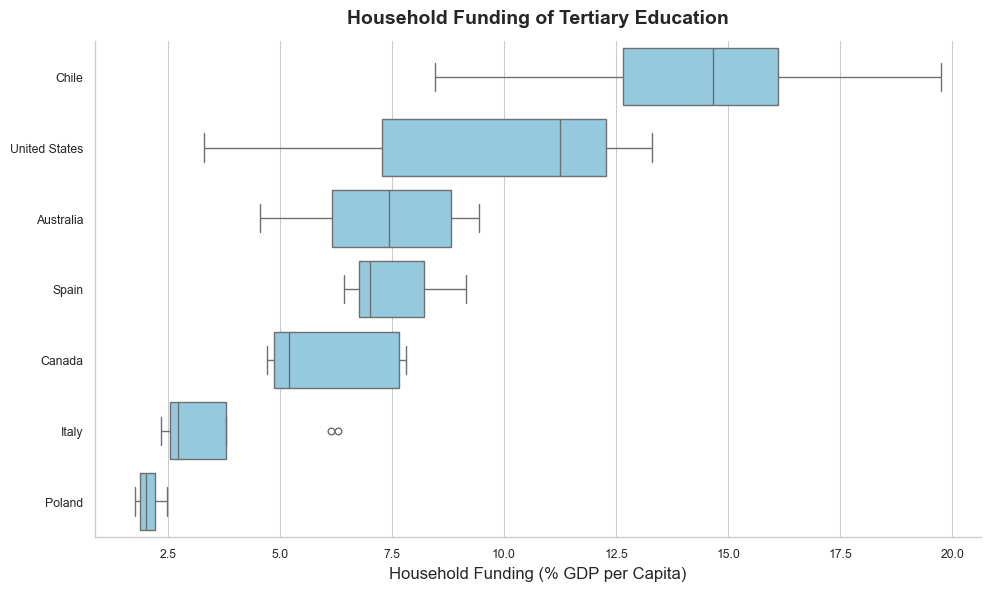

In [31]:
# Household Education Expenditure (% GDP)
plt.figure(figsize=(10, 6))
df_sorted = df_long.sort_values("Household funding, tertiary (% GDP/capita)", ascending=False)
df_sorted = df_sorted[df_sorted['Household funding, tertiary (% GDP/capita)'] > 0]

# Plot
sns.boxplot(
    data=df_sorted, 
    x="Household funding, tertiary (% GDP/capita)", 
    y="country", 
    color="skyblue"
)

# Format
plt.title("Household Funding of Tertiary Education", fontsize=14, weight='bold', y=1.02)
plt.xlabel("Household Funding (% GDP per Capita)", fontsize=12)
plt.ylabel("")
sns.despine(top=True, right=True)

# Save
plt.tight_layout()
plt.savefig(figures_path + 'household_education_expenditure.png', dpi=300)
plt.show()

Observations:
* Household contributions to tertiary education vary significantly across countries.
* It's surprising to see the proportion of household funding of tertiary education in Chile considering proportional national budget.

### Bivariate analysis

#### Correlation across variables

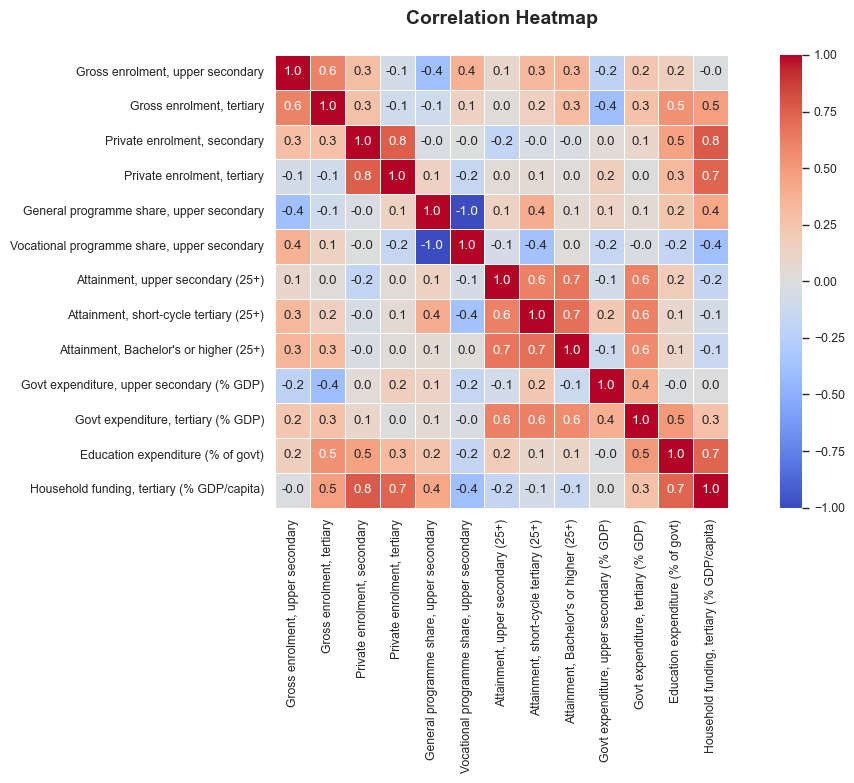

In [35]:
# Correlation heatmap
numeric = df_long.select_dtypes(include=['number'])
numeric = numeric.drop(columns=['year'])
correlation_matrix = numeric.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True, 
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=14, weight='bold', y=1.05)

# Save
plt.tight_layout()
plt.savefig(figures_path + "correlation_heatmap", dpi=300)
plt.show()

#### Government Education Budget and Household Funding

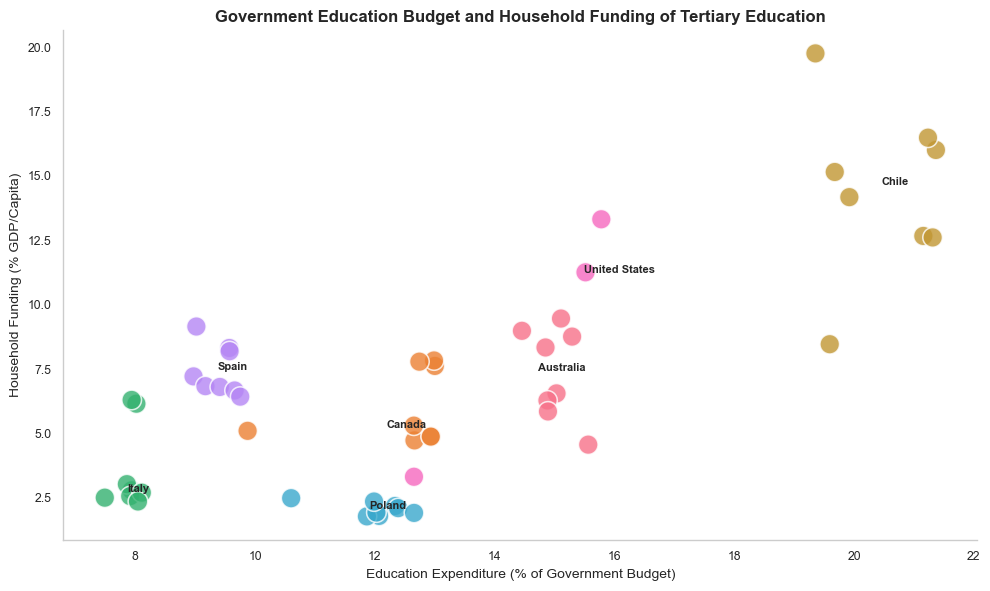

In [37]:
# Select variables
df = df_short_mean[
    df_short_mean['Education expenditure (% of govt)'].notna() & 
    df_short_mean['Household funding, tertiary (% GDP/capita)'].notna()
]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_long,
    x='Education expenditure (% of govt)',
    y='Household funding, tertiary (% GDP/capita)',
    hue='country',
    s=200,
    alpha=0.8
)

# Format
plt.title("Government Education Budget and Household Funding of Tertiary Education", 
          fontsize=12, weight='bold')
plt.xlabel("Education Expenditure (% of Government Budget)", fontsize=10)
plt.ylabel("Household Funding (% GDP/Capita)", fontsize=10)
plt.grid(False)
sns.despine(top=True, right=True)
plt.legend('', frameon=False)

# Annotate
for line in range(0, df.shape[0]):
    plt.text(
        df['Education expenditure (% of govt)'].iloc[line],
        df['Household funding, tertiary (% GDP/capita)'].iloc[line],
        df['country'].iloc[line],
        fontsize=8,
        fontweight='bold',
        ha='left'
    )

# Save
plt.tight_layout()
plt.savefig(figures_path + 'govt_edu_budget_hh_edu_funding.png', dpi=300)
plt.show()

Observations:
* One could expect a negative relationship, findings might suggest national priority

#### Government Expenditure and Gross Enrolment (Upper Secondary)

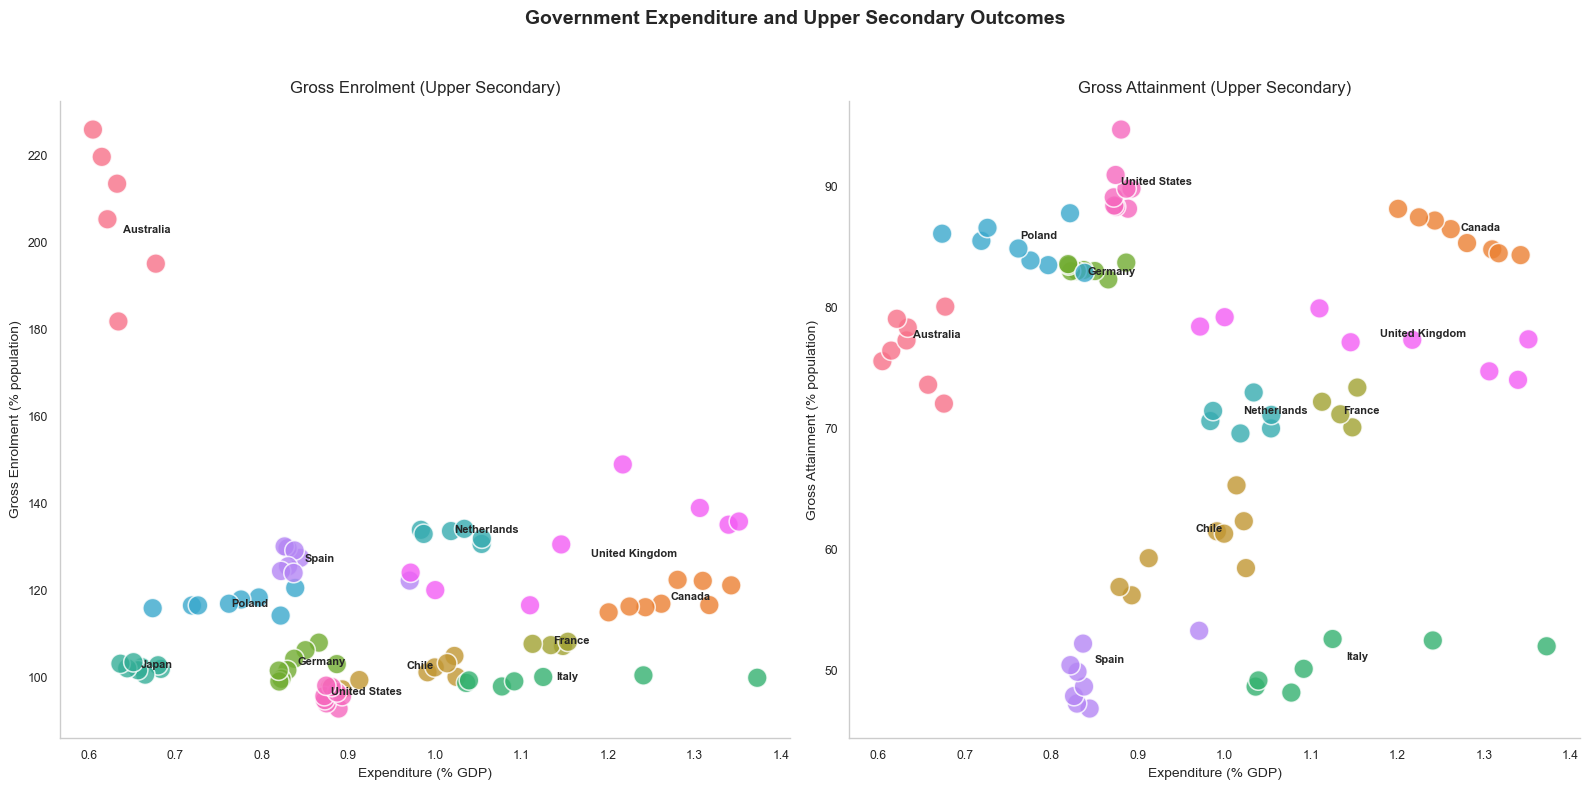

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=False)
fig.suptitle("Government Expenditure and Upper Secondary Outcomes", fontsize=14, weight='bold')

# Left plot: Government Expenditure vs Gross Enrolment
df_enrolment = df_short_mean[
    df_short_mean['Govt expenditure, upper secondary (% GDP)'].notna() & 
    df_short_mean['Gross enrolment, upper secondary'].notna()
]

sns.scatterplot(
    ax=axes[0],
    data=df_long,
    x='Govt expenditure, upper secondary (% GDP)',
    y='Gross enrolment, upper secondary',
    hue='country',
    s=200,
    alpha=0.8
)
axes[0].set_title("Gross Enrolment (Upper Secondary)", fontsize=12)
axes[0].set_xlabel("Expenditure (% GDP)", fontsize=10)
axes[0].set_ylabel("Gross Enrolment (% population)", fontsize=10)
axes[0].grid(False)
sns.despine(ax=axes[0], top=True, right=True)
axes[0].legend('', frameon=False)

# Annotate
for line in range(0, df_enrolment.shape[0]):
    axes[0].text(
        df_enrolment['Govt expenditure, upper secondary (% GDP)'].iloc[line],
        df_enrolment['Gross enrolment, upper secondary'].iloc[line],
        df_enrolment['country'].iloc[line],
        fontsize=8,
        fontweight='bold',
        ha='left'
    )

# Right plot: Government Expenditure vs Attainment
df_attainment = df_short_mean[
    df_short_mean['Govt expenditure, upper secondary (% GDP)'].notna() & 
    df_short_mean['Attainment, upper secondary (25+)'].notna()
]

sns.scatterplot(
    ax=axes[1],
    data=df_long,
    x='Govt expenditure, upper secondary (% GDP)',
    y='Attainment, upper secondary (25+)',
    hue='country',
    s=200,
    alpha=0.8
)
axes[1].set_title("Gross Attainment (Upper Secondary)", fontsize=12)
axes[1].set_xlabel("Expenditure (% GDP)", fontsize=10)
axes[1].set_ylabel("Gross Attainment (% population)", fontsize=10)
axes[1].grid(False)
sns.despine(ax=axes[1], top=True, right=True)
axes[1].legend('', frameon=False)

# Annotate
for line in range(0, df_attainment.shape[0]):
    axes[1].text(
        df_attainment['Govt expenditure, upper secondary (% GDP)'].iloc[line],
        df_attainment['Attainment, upper secondary (25+)'].iloc[line],
        df_attainment['country'].iloc[line],
        fontsize=8,
        fontweight='bold',
        ha='left'
    )

# Save
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(figures_path + 'govt_edu_budget_outcomes_upper_sec_combined.png', dpi=300)
plt.show()

#### Government Expenditure on Tertiary Education and Enrolment

<Figure size 1200x800 with 0 Axes>

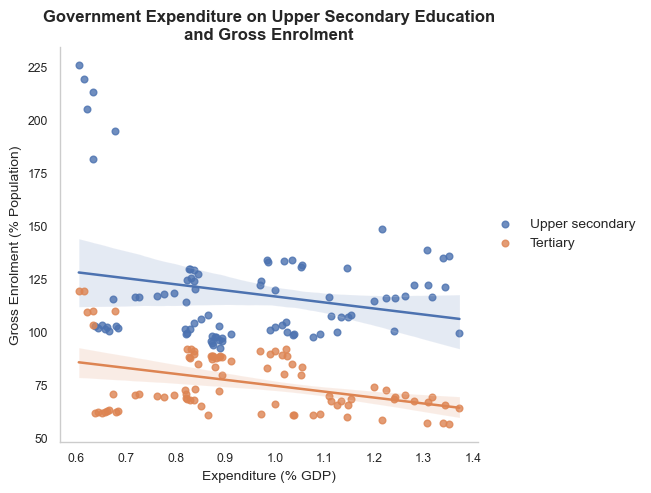

In [42]:
# Select variables
variables = [
    'Gross enrolment, upper secondary',
    'Gross enrolment, tertiary',
]

df = df_long.melt(
    id_vars=['country', 'Govt expenditure, upper secondary (% GDP)'], 
    value_vars=variables, 
    var_name='Indicator', 
    value_name='Value'
)

df['Level'] = df['Indicator'].replace({
    'Gross enrolment, upper secondary': 'Upper secondary',
    'Gross enrolment, tertiary': 'Tertiary',
})

# Plot
plt.figure(figsize=(12, 8))
sns.lmplot(
    data=df,
    x='Govt expenditure, upper secondary (% GDP)',
    y='Value',
    hue='Level',
    facet_kws={'legend_out': False}
)

# Format
plt.title("Government Expenditure on Upper Secondary Education\nand Gross Enrolment", 
          fontsize=12, weight='bold')
plt.xlabel("Expenditure (% GDP)", fontsize=10)
plt.ylabel("Gross Enrolment (% Population)", fontsize=10)
plt.grid(False)
sns.despine(top=True, right=True)
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1, 0.6),
    fontsize=10,
    frameon=False
)

# Save
plt.subplots_adjust(top=0.9)
plt.savefig(figures_path + 'govt_exp_secondary_enrolment.png', dpi=300)
plt.show()

#### Government Expenditure on Tertiary Education and Education Attainment

<Figure size 1200x800 with 0 Axes>

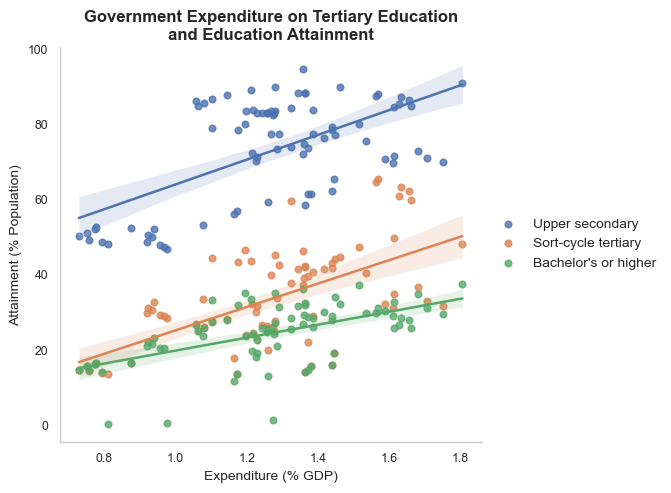

In [44]:
# Select variables
variables = [
    'Attainment, upper secondary (25+)',
    'Attainment, short-cycle tertiary (25+)',
    "Attainment, Bachelor's or higher (25+)"
]

df = df_long.melt(
    id_vars=['country', 'Govt expenditure, tertiary (% GDP)'], 
    value_vars=variables, 
    var_name='Indicator', 
    value_name='Value'
)

df['Level'] = df['Indicator'].replace({
    'Attainment, upper secondary (25+)': 'Upper secondary',
    'Attainment, short-cycle tertiary (25+)': 'Sort-cycle tertiary',
    "Attainment, Bachelor's or higher (25+)": "Bachelor's or higher"
})

# Plot
plt.figure(figsize=(12, 8))
sns.lmplot(
    data=df,
    x='Govt expenditure, tertiary (% GDP)',
    y='Value',
    hue='Level',
    facet_kws={'legend_out': False}
)

# Format
plt.title("Government Expenditure on Tertiary Education\nand Education Attainment", 
          fontsize=12, weight='bold')
plt.xlabel("Expenditure (% GDP)", fontsize=10)
plt.ylabel("Attainment (% Population)", fontsize=10)
plt.grid(False)
sns.despine(top=True, right=True)
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1, 0.6),
    fontsize=10,
    frameon=False
)

# Save
plt.subplots_adjust(top=0.9)
plt.savefig(figures_path + 'govt_exp_tertiary_attainment.png', dpi=300, bbox_inches='tight')
plt.show()

#### Household Expenditure on Tertiary Education and Private Enrolment

<Figure size 1200x800 with 0 Axes>

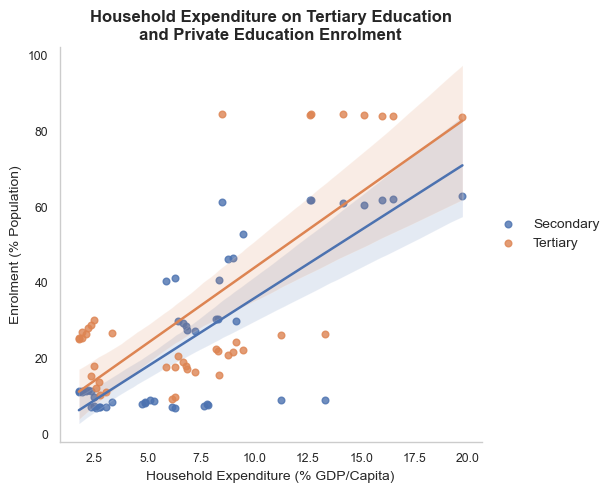

In [46]:
# Select variables
variables = [
    'Private enrolment, secondary',
    'Private enrolment, tertiary',
]

df = df_long.melt(
    id_vars=['country', 'Household funding, tertiary (% GDP/capita)'], 
    value_vars=variables, 
    var_name='Indicator', 
    value_name='Value'
)

df['Level'] = df['Indicator'].replace({
    'Private enrolment, secondary': 'Secondary',
    'Private enrolment, tertiary': 'Tertiary',
})

# Plot
plt.figure(figsize=(12, 8))
sns.lmplot(
    data=df,
    x='Household funding, tertiary (% GDP/capita)',
    y='Value',
    hue='Level',
    facet_kws={'legend_out': False}
)

# Format
plt.title("Household Expenditure on Tertiary Education\nand Private Education Enrolment", 
          fontsize=12, weight='bold')
plt.xlabel("Household Expenditure (% GDP/Capita)", fontsize=10)
plt.ylabel("Enrolment (% Population)", fontsize=10)
plt.grid(False)
sns.despine(top=True, right=True)
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1, 0.6),
    fontsize=10,
    frameon=False
)

# Save
plt.subplots_adjust(top=0.9)
plt.savefig(figures_path + 'hh_exp_tertiary_enrolment.png', dpi=300)
plt.show()

#### Grouped variables by education level

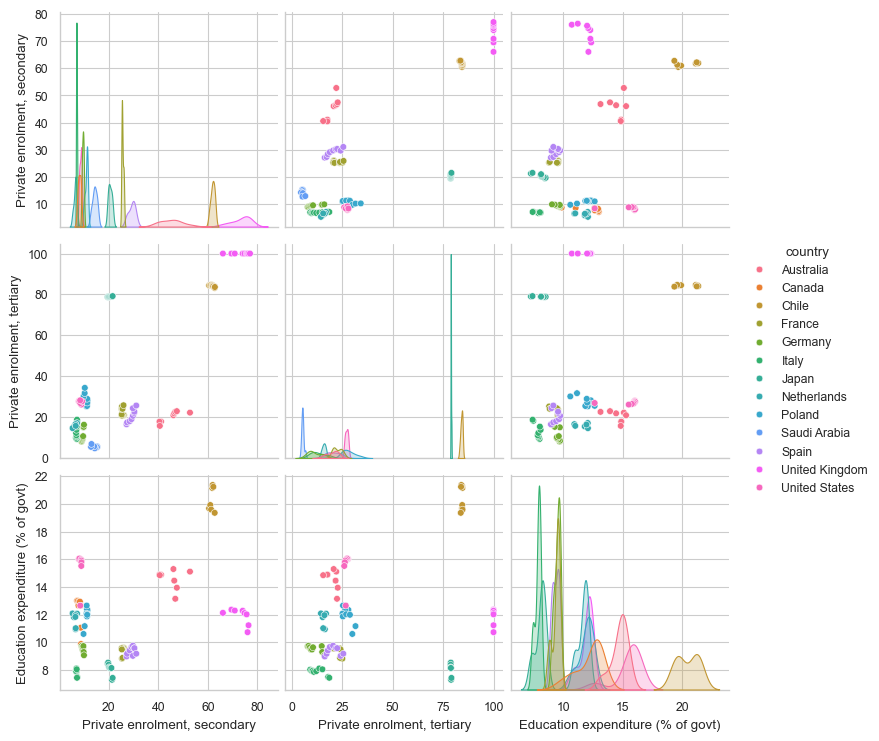

In [48]:
# Upper secondary vairables
variables = [
    'Private enrolment, secondary',
    'Private enrolment, tertiary',
    'Education expenditure (% of govt)',
    'country'
]

pairwise_df = df_long.loc[:, variables]

sns.pairplot(pairwise_df, hue='country')

# Save
plt.savefig(figures_path + 'check.png', dpi=300)
plt.show()